<center><img src="KFUPM.png"/></center>



<center> <h1>COE-530 – Quantum Computers and Architecture</h1> </center>
<center> <h2>Assignment - 1</h> </center>


------

#### Student Information

| Course Name | Studnet ID | Student Name | Univeristy |
| :-: | :-: | :-: | :-: |
| COE-530 - Quantum Computers and Architecture | G202418600 | Shouq L. Al-anazi | King Fahd University for Petrulume and Minerals (KFUPM)  |


<br>

<center> <h1>Quantum Half , Full Adders and 3-Bit Ripple Adders</h1> </center>


### Summary 
This is the implemenation part for the Quantum Half Adder , Full Adder and a 3-Bit Carry Adder. as part of COE-530 course requirements (Assignment)
<br>



<center><iframe src="https://giphy.com/embed/CjmvTCZf2U3p09Cn0h" width="480" height="461" style="" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/leroypatterson-cat-glasses-CjmvTCZf2U3p09Cn0h">via GIPHY</a></p> </center>

### Part 1. Important Installations/Imports
Setting up the needed Qiskit and Python libraries

In [2]:
#Imports 
from qiskit import QuantumCircuit, transpile , QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import qiskit.quantum_info as qi
from numpy.random import randint
import numpy as np
%matplotlib inline


if there are some error in the imports , please make sure to do " pip install *** " and write down the missing packages. :)

### Part 2. Quantum Half Adder Implementation


<center> <h1> Simulation been added in the word file and created using IBM Quantum Composer </h1></center>
<center> <h3> Below is the circuit creation as a reference </h3></center>


#### Circuit Creation & Transpilation

***Transpilation Process*** : Transpilation transforms the created circuit such that only instructions available on a chosen backend are used (below im using QASM), and optimizes those instructions to minimize the effects of noise. [ https://docs.quantum.ibm.com/guides/transpile ]

In [76]:
# Creating a circuit with 3 quantum bits and 2 classical bits
qc = QuantumCircuit(3,2)

# Preparing inputs
#qc.x(0) # Qbit0 = |0>
#qc.x(1) # Qbit1 = |0>
# Qbit2 (is|0> always) 

In [77]:
# Applying XOR operation and append result to Qbit1
qc.cx(0,1)

# Applying AND operation and append result to Qbit2
qc.ccx(0,1,2)


# Outputs Measurements
qc.measure(1,0) # Reading XOR value ( sum bit )
qc.measure(2,1) # Reading AND value ( carry-out bit )

# Run the experiment 1024 times and get stats
transpiled = transpile(qc)
counts = Aer.get_backend('qasm_simulator').run(transpiled).result().get_counts() # Since i didn't specify the number of shots, automatically its default is 1024 
## Here i've done multitple steps in one line which is creating the simulator and execcuting the job locally using the simulator and retrieving the results

#print(counts)
print(f" \n Results of running the experiment 1024 time : {counts}   \n ")

# Extract the result
output = list(counts.keys())[0]
sum_bit = int(output[1])
carry_bit = int(output[0])

print(f"SUM : {sum_bit}  CARRY :  {carry_bit}")

 
 Results of running the experiment 1024 time : {'00': 1024}   
 
SUM : 0  CARRY :  0


Original Circuit 



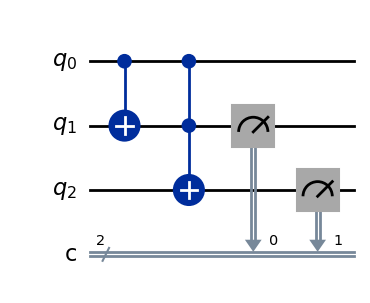

In [78]:
print("Original Circuit \n")
qc.draw('mpl')

### Part 3. Quantum Full Adder Implementation


<center> <h1> Simulation been added in the word file and created using IBM Quantum Composer </h1></center>
<center> <h3> Below is the circuit creation as a reference </h3></center>


SUM : 1  |  CARRY : 1


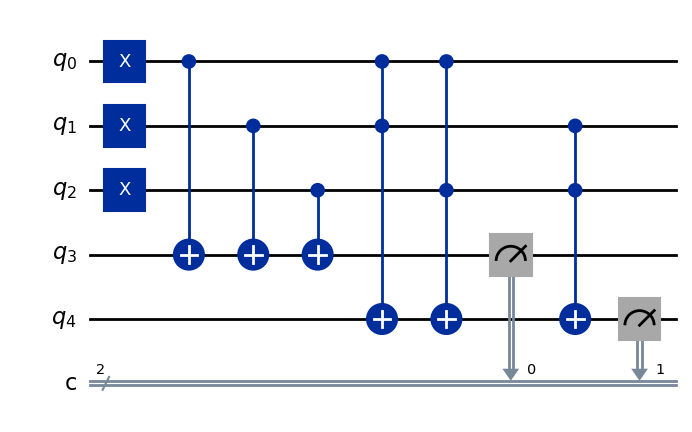

In [79]:
# Create a quantum circuit with 5 qubits and 2 classical bits
# 2 qubits for inputs a and b, 1 for carry-in, 1 for sum, 1 for carry-out
qc = QuantumCircuit(5, 2)

# Initialize inputs a, b, and carry-in (here the input is 1 1 1)
qc.x(0)  # Set qubit 0 to 1 if a = 1
qc.x(1)  # Set qubit 1 to 1 if b = 1
qc.x(2)  # Set qubit 2 to 1 if cin = 1

# Sum (XOR of a, b, and carry-in)
qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(2, 3)

# Carry-out calculation
qc.ccx(0, 1, 4)
qc.ccx(0, 2, 4)
qc.ccx(1, 2, 4)

### Outputs Measurements
qc.measure(3, 0)  # Sum to classical bit 0
qc.measure(4, 1)  # Carry-out to classical bit 1

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, simulator)
result = simulator.run(compiled).result()
counts = result.get_counts()

# Extract the result
output = list(counts.keys())[0]
sum_bit = int(output[1])
carry_bit = int(output[0])
print(f"SUM : {sum_bit}  |  CARRY : {carry_bit}")

qc.draw("mpl")

### Part 3. Quantum 3-Bit Ripple Carry Adder Implementation


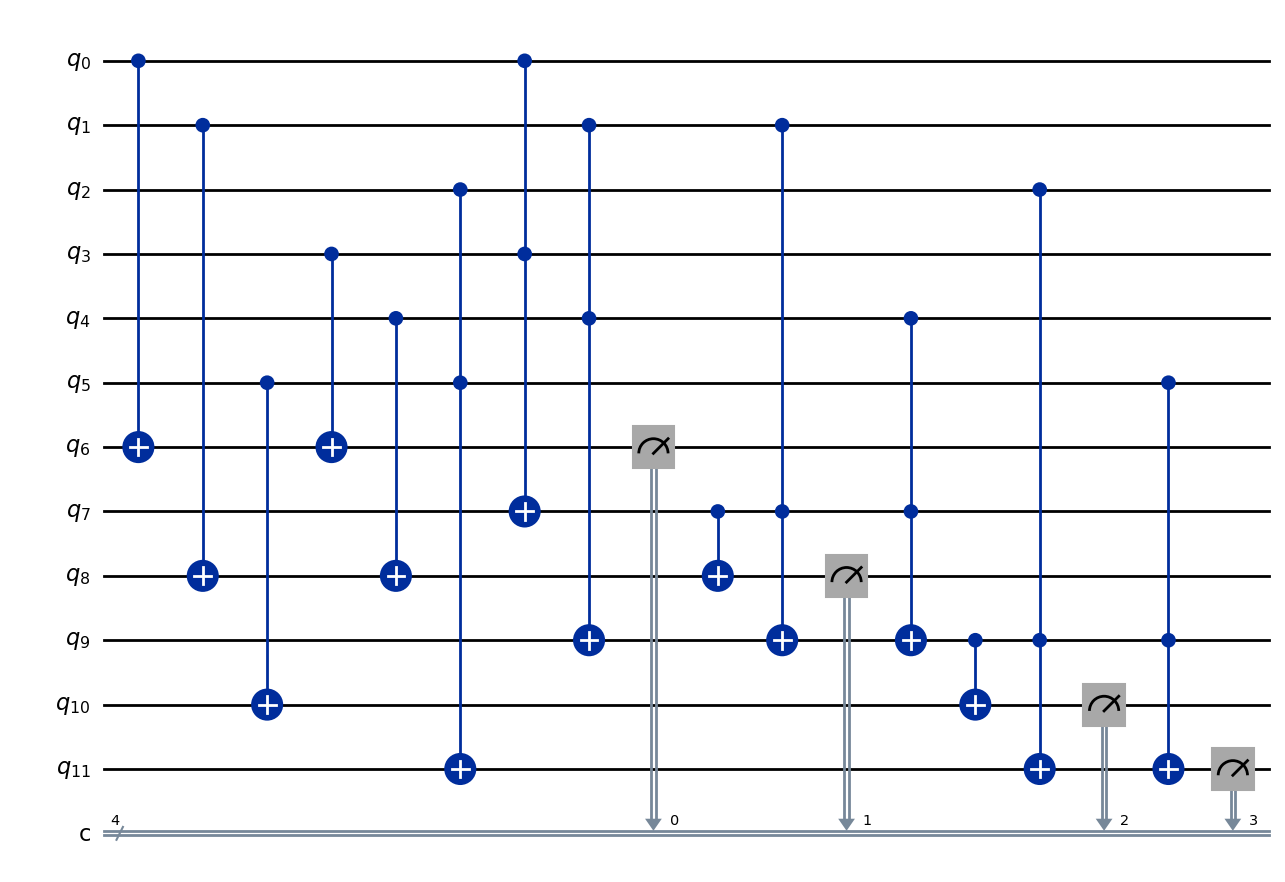

In [80]:
# Create a quantum circuit with ( 12 ) qubits and ( 4 ) classical bits
# 3 Bits each for Input A and Input B | 3 for SUM, 1 for final carry
qc = QuantumCircuit(12, 4)

# First Full Adder (A0 , B0 and 1st Carry-In with value 0)
qc.cx(0, 6)
qc.cx(3, 6)
qc.ccx(0, 3, 7)

# Second Full Adder (A1, B1 and the Carry-Out from previous Summation act as 2nd Carry-In)
qc.cx(1, 8)
qc.cx(4, 8)
qc.cx(7, 8)
qc.ccx(1, 4, 9)
qc.ccx(1, 7, 9)
qc.ccx(4, 7, 9)

# Third Full Adder (A2, B2 and the Carry-Out from previous Summation act as a 3rd Carry-In)
qc.cx(5, 10)
qc.cx(9, 10)
qc.ccx(2, 5, 11)
qc.ccx(2, 9, 11)
qc.ccx(5, 9, 11)

# Outputs Measurements
qc.measure(6, 0)  # Sum bit 0
qc.measure(8, 1)  # Sum bit 1
qc.measure(10, 2) # Sum bit 2
qc.measure(11, 3) # Final Carry-Out

# Circuit Simulation & Transpilation
simulator = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=1).result()
counts = result.get_counts()

# Extract the result
output = list(counts.keys())[0]
sum_bits = output[1:4][::-1]  # Reverse order for correct bit positions
carry_out = int(output[0])
sum_result = int(sum_bits, 2)

# Drawing the Original Circuit
qc.draw("mpl")


### Part 4. Quantum 3-Bit Ripple Carry Adder Implementation with my Student ID as entry
Last step from the assignment with using the Student-ID information

In [82]:
# Create a quantum circuit with 12 qubits and 4 classical bits
# 3 bits each for a and b, 3 for sum, 1 for final carry
qc = QuantumCircuit(12, 4)

# Calculate Input A and Input B based on my KFUPM-Student-ID : 202418600
first = 0 + 0    # Last two digits: 00
second = 8 + 6   # Two before last: 86
A = first % 8
B = second % 8

# Initialize Inputs A and B (3 bits each) [ the below is one of python features for Binary positioning]
## [Info source : https://stackoverflow.com/questions/22832615/what-do-and-mean-in-python]
for i in range(3):
    if (A >> i) & 1:
        qc.x(i)  # Setting Qubits 0, 1, 2 for A
    if (B >> i) & 1:
        qc.x(i + 3)  # Settting Qubits 3, 4, 5 for B


# First Full Adder (A0 , B0 and 1st Carry-In with value 0)
qc.cx(0, 6)
qc.cx(3, 6)
qc.ccx(0, 3, 7)

# Second Full Adder (A1, B1 and the Carry-Out from previous Summation act as 2nd Carry-In)
qc.cx(1, 8)
qc.cx(4, 8)
qc.cx(7, 8)
qc.ccx(1, 4, 9)
qc.ccx(1, 7, 9)
qc.ccx(4, 7, 9)

# Third Full Adder (A2, B2 and the Carry-Out from previous Summation act as a 3rd Carry-In)
qc.cx(5, 10)
qc.cx(9, 10)
qc.ccx(2, 5, 11)
qc.ccx(2, 9, 11)
qc.ccx(5, 9, 11)

# Outputs Measurements
qc.measure(6, 0)  # Sum bit 0
qc.measure(8, 1)  # Sum bit 1
qc.measure(10, 2) # Sum bit 2
qc.measure(11, 3) # Final Carry-Out

# Circuit Simulation & Transpilation
simulator = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=1).result()
counts = result.get_counts()

# Extract the result
output = list(counts.keys())[0]
sum_bits = output[1:4][::-1]  # Reverse order for correct bit positions
carry_out = int(output[0])
sum_result = int(sum_bits, 2)



print(f"Shouq's ID-Based Inputs (KFUPM-Student-ID : 202418600) \nInput A (Decimal) = {A} | Input B (Decimal) = {B}")

print(f"\nResults \nInput A : {A:03b} | Input B : {B:03b} | Sum (Adder Result): {sum_result:03b} | Final Carry Out: {carry_out}")


Shouq's ID-Based Inputs (KFUPM-Student-ID : 202418600) 
Input A (Decimal) = 0 | Input B (Decimal) = 6

Results 
Input A : 000 | Input B : 110 | Sum (Adder Result): 011 | Final Carry Out: 0


---------

<center> <h3>Done</h3> </center>

<center><iframe src="https://giphy.com/embed/Pla6TIXl1TmCJpLRsp" width="480" height="398" style="" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/CBSAllAccess-season-4-episode-22-sabrina-the-teenage-witch-Pla6TIXl1TmCJpLRsp">via GIPHY</a></p></center>